## Mapping cholera outbreak in Soho, London in 1854

### Introduction :
This short project aims at reanalyzing the data gathered by receating Dr. Jon Snow during the cholera outbreak in Soho, London in 1854. 

<p>Dr. Snow was famous British physician and an avocate of anesthesia and hygienic practices in medicine. In early to mid-1800's cholera outbreaks occured regularly in the city of London and "bad air" was believed to be the reason for the outbreaks. Dr. John Snow's experience with anesthesia made him suspect that the miasma theory (bad air causing deseas) was not valid in case of cholera. He collected the data on cholera deaths and attacks with resepct to their geographical location and geograhical locations of the public water pumps used in an affected area, namely Soho in London. After plotting the attacks and deaths on a map, he observed that that maximum number of attacks/deaths are happening in the vicinity of one water pump, among the people who have been using water from the pump.He further observed significant decrease in deaths after the pump had been put out of order. This supported his theory that cholera is a waterborn deseas.</p>

In this project I have reanalyzed Dr.Snow's data and recreated the map intially made by him. I have:
1. Downloaded the dataset from datacamp.com
2. used Pandas for data manipulation
3. used folium for creating the map
4. used seaborn for data visulaization.

### Setting up the code environment, loading data:
First, I will read two ddata sets, giving the geographical locations of where the deaths have occured (deaths) and the water pumps (pumps).

In [1]:
# Loading in the required modules
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import folium 

# Reading in the geographical locations of deaths occured and water pumps
deaths_location = pd.read_csv("datasets/deaths.csv")
pumps_location =  pd.read_csv("datasets/pumps.csv")
# Print out the shape of the dataset and the first 5 rows
print("Shape of deaths dataframe is:", deaths_location.shape)
print(deaths_location.head())
print(deaths_location.describe())
print("Shape of pumps dataframe is:", pumps_location.shape)
print(pumps_location.head())



Shape of deaths dataframe is: (489, 3)
   Death  X coordinate  Y coordinate
0      1     51.513418     -0.137930
1      1     51.513418     -0.137930
2      1     51.513418     -0.137930
3      1     51.513361     -0.137883
4      1     51.513361     -0.137883
       Death  X coordinate  Y coordinate
count  489.0    489.000000    489.000000
mean     1.0     51.513398     -0.136403
std      0.0      0.000705      0.001503
min      1.0     51.511856     -0.140074
25%      1.0     51.512964     -0.137562
50%      1.0     51.513359     -0.136226
75%      1.0     51.513875     -0.135344
max      1.0     51.515834     -0.132933
Shape of pumps dataframe is: (8, 3)
        Pump Name  X coordinate  Y coordinate
0       Broad St.     51.513341     -0.136668
1    Crown Chapel     51.513876     -0.139586
2  Gt Marlborough     51.514906     -0.139671
3        Dean St.     51.512354     -0.131630
4         So Soho     51.512139     -0.133594


### Exploring data : 
The dataframe *deaths* has three columns and 489 rows. Every row entry in column 'Death' represents single death, it will not be used further. The interesting columns are the X coordinate and Y coordinate. We need to make them from two separatecolumns of a dataframe into pairs of (x coordinate, y coordinate) in order to be plotted with folium. So, I extract the two columns into a data frame called and then convert it into a list. Each row of the new dataframe will be a list in the list of lists. d I check that the lenth of this list of list matches with number of rows in original datafframe. I write a function df_subset_list for this.</p>  

*pumps_location* dataframe has 8 rows and three coulmns. I process both the dataframes *deaths_location* and *pumps_location* in same manner to extract spatial coordinates. 

In [2]:
# Write function df to subset the dataframe and create a list of list 
  
def df_subset_list(df,column_numbers): 
# df : data frame to be subsetted, column_numbers : list of columns to retain in subset    
# subset
    df_sub = df.iloc[:,column_numbers]
# list
    df_list = df_sub.values.tolist()
# check 
    if df_sub.shape[0]==len(df_list):
         list_list = df_list
      
    return  list_list  
# preparing deaths_locations and pumps_location data frames for platting on map.
deaths_location_list = df_subset_list(deaths_location,[1,2])
pumps_location_list =  df_subset_list(pumps_location,[1,2])

# location for centering the map :
mean_deaths_location = [round(deaths_location['X coordinate'].mean(),5), round(deaths_location['Y coordinate'].mean(),5)]


### Recreating Dr.Snow's Map
I create a base map uing the coordinates I have found earlier and plot the locations of deaths and the location of the water pumps
on the same base map.

In [3]:
map = folium.Map(location=mean_deaths_location, tiles='Stamen Toner', zoom_start=17)
for point in range(0, len(deaths_location_list)):
    folium.CircleMarker(deaths_location_list[point], radius=8, color='red', fill=True, fill_color='red', opacity = 0.4).add_to(map)
map
map1=map
for point in range(0, len(pumps_location_list)):
    folium.Marker(pumps_location_list[point], popup=pumps_location['Pump Name'][point]).add_to(map1)
map1

From primary inspection of the map it is clear that the majority of deaths happened on and around Broadwick street and there is one water pump at the center of this street (name of pump : Broad Steet). When Dr.Snow  realised that most of the ill/ dead people drank water from this pump, he asked to put the pump out of order which was done on 8 sept 1854. Let us have a look at a new dataset, giving information about attacks/deaths due to cholera in this region and find out if there was really any effect of stopping the water pump. </p>

### Effect of shutting down a water pump 
I read the dataset *dates.csv* into dataframe *dates* and explore it to see the columns and its temporal range.

In [4]:
dates = pd.read_csv('datasets/dates.csv', parse_dates=['date'])
print(dates.head(2))
print(dates.tail(2))


   order       date  attacks  deaths
0      1 1854-08-19        1       1
1      2 1854-08-20        1       0
    order       date  attacks  deaths
41     42 1854-09-29        0       1
42     43 1854-09-30        0       0


So, the dataframe *dates* contains records from mid-August to the end of September 1854 and the water pump was shut down on 
8 Sept. It is interesting to see the effect of this shut down on number of attacks or deaths.

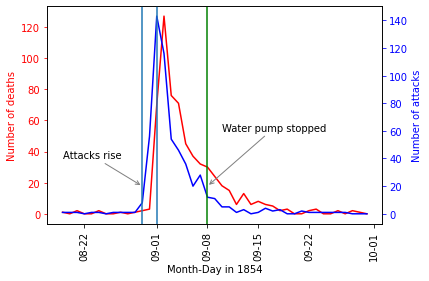

In [5]:
#Fuction to plot time series 
def plot_timeseries(axes, x, y, color, xlabel, ylabel):

  # Plot the inputs x,y in the provided color
  axes.plot(x,y, color=color)

  # Set the x-axis label
  axes.set_xlabel(xlabel)

  # Set the y-axis label
  axes.set_ylabel(ylabel, color=color)

  # Set the colors tick params for y-axis
  axes.tick_params('y', colors=color)
    
  # change the format of date and rotate  
  axes.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))
  #ax.xaxis.set_minor_formatter(mdates.DateFormatter("%m-%d"))
  _=plt.xticks(rotation=90) 


# Plot Number of deaths vs date 
fig,ax = plt.subplots()
plot_timeseries(ax,dates["date"], dates["deaths"], "red", "Month-Day in 1854", "Number of deaths")

# Plot Number of attacks vs date
ax1 = ax.twinx()
plot_timeseries(ax1,dates["date"], dates["attacks"], "blue", "Month-Day in 1854", "Number of attacks")

# Add vertical lines to imphasize some dates and add annotations
plt.axvline(x=pd.Timestamp('1854-09-08'), color= 'green')
plt.axvline(x=pd.Timestamp('1854-08-30'))
plt.axvline(x=pd.Timestamp('1854-09-01'))
plt.annotate("Water pump stopped", xy=(pd.Timestamp('1854-09-08'),20), xytext=(pd.Timestamp('1854-09-10'),60), arrowprops={'arrowstyle': '->','color':'gray'})
plt.annotate("Attacks rise", xy=(pd.Timestamp('1854-08-30'),20), xytext=(pd.Timestamp('1854-08-19'),40), arrowprops={'arrowstyle': '->','color':'gray'})
plt.show()

### Conclusion :
It is clear from the graph above that the cholera outbreak in August-September of 1854 started abruptly with a sharp increase in number of attacks. The peak was reached in two days.
The number of deaths followed simillar trend of sharp increase, just one day after the peak of attacks was reached. Although the numer of attacks had also dropped
sharly, decrease in number of deaths was slow as compared to attacks. The water pump was closed on Sept 08, 1854 and one can see decrease
in number of deaths after that. 

There is some support to Dr. Snow's theory of cholera being a waterborne desease, although it can not be proven concluively just with this data.